# Impact of K in KNN

In [1]:
%matplotlib inline
import numpy as np
from nltk.corpus import names
import matplotlib.pyplot as plt

In [3]:
m = names.words('male.txt')
f = names.words('female.txt')

In [4]:
import random
random.seed(1234) # It is useful to set the seed to allow replicability
names = ([(name,'male') for name in m] +
         [(name,'female') for name in f])
random.shuffle(names)
train_names = names[1500:]
devtest_names = names[500:1500]
test_names = names[:500]

In [5]:
def gender_features_knn(word):
    "Return a list with the ASCII of the last 10 characters"
    features = np.zeros(10)
    for i in range(min(len(word),10)):
        features[-i] = ord(word[-i])
    return features

In [7]:
train_set_knn=[(gender_features_knn(n),g) for (n,g) in train_names]
devtest_set_knn=[(gender_features_knn(n),g) for (n,g) in devtest_names]
train_X, train_y = zip(*train_set_knn)
devtest_X, devtest_y = zip(*devtest_set_knn)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
train_accuracy = []
devtest_accuracy = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X,train_y)
    devtest_predictions = knn_classifier.predict(devtest_X)
    devtest_accuracy.append(accuracy_score(devtest_y,devtest_predictions))
    train_predictions = knn_classifier.predict(train_X)
    train_accuracy.append(accuracy_score(train_y,train_predictions))

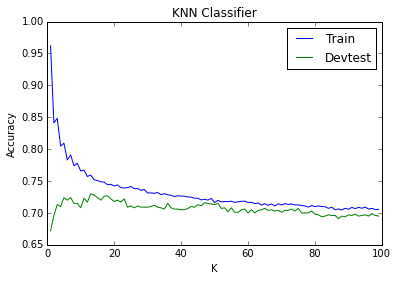

In [10]:
plt.plot(range(1,100),train_accuracy,label='Train')
plt.plot(range(1,100),devtest_accuracy,label='Devtest')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier')
plt.legend()

# Impact of Features in KNN

In [11]:
def gender_features2_knn(word,limit=10):
    "Return a list with the ASCII of the last 10 characters"
    features = np.zeros(10)
    for i in range(min(len(word),limit)):
        features[-i] = ord(word[-i])
    return features

In [13]:
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1,10):
    train_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in train_names]
    devtest_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    knn_classifier = KNeighborsClassifier(n_neighbors=15)
    knn_classifier.fit(train2_X,train2_y)
    devtest_predictions = knn_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y,devtest_predictions))
    train_predictions = knn_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y,train_predictions))

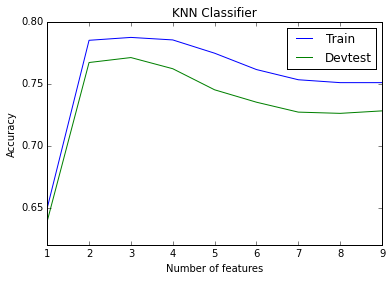

In [15]:
plt.plot(range(1,10),train_accuracy2,label='Train')
plt.plot(range(1,10),devtest_accuracy2,label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('KNN Classifier')
plt.legend()

# Impact of Features in Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1,10):
    train_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in train_names]
    devtest_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    nb_classifier = MultinomialNB()
    nb_classifier.fit(train2_X,train2_y)
    devtest_predictions = nb_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y,devtest_predictions))
    train_predictions = nb_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y,train_predictions))

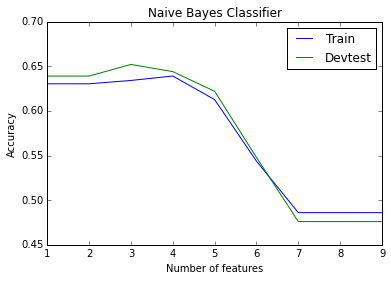

In [17]:
plt.plot(range(1,10),train_accuracy2,label='Train')
plt.plot(range(1,10),devtest_accuracy2,label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier')
plt.legend()

# Impact of Features in Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
train_accuracy2 = []
devtest_accuracy2 = []
for limit in range(1,10):
    train_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in train_names]
    devtest_set2_knn=[(gender_features2_knn(n,limit),g) for (n,g) in devtest_names]
    train2_X, train2_y = zip(*train_set2_knn)
    devtest2_X, devtest2_y = zip(*devtest_set2_knn)
    lr_classifier = LogisticRegression()
    lr_classifier.fit(train2_X,train2_y)
    devtest_predictions = lr_classifier.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y,devtest_predictions))
    train_predictions = lr_classifier.predict(train2_X)
    train_accuracy2.append(accuracy_score(train2_y,train_predictions))

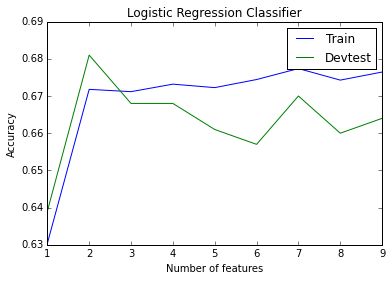

In [19]:
plt.plot(range(1,10),train_accuracy2,label='Train')
plt.plot(range(1,10),devtest_accuracy2,label='Devtest')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier')
plt.legend()